# Porosity

# Data: nlog_porperm

## Load packages and datasets

In [1]:
#install packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import string

import warnings
from scipy.optimize import OptimizeWarning

In [2]:
#set path
folder = "/Users/uib/Documents/Python/Porosity"
input_data = "/Input_data/"

#load files
path_df = os.path.join(folder+input_data, "nlog_poroperm.xlsx")
df = pd.read_excel(path_df)
path_code = os.path.join(folder+input_data, "code_to_lithology.xlsx")
df_code= pd.read_excel(path_code)

## Clean and combine datasets

In [3]:
#make a column with the first letter of the STRAT_UNIT_CD
df['First_letter']= df['STRAT_UNIT_CD'].str[0]
#remove all rows older then the Cenozoic (keep only rows with first letter N)
df = df[df['First_letter']=='N']

In [4]:
#There is no information for the STRAT_UNIT_CD N, NLFFD, NUCT. Remove these rows from df and df_code
df = df[~df['STRAT_UNIT_CD'].isin(['N', 'NLFFD', 'NUCT'])]

#Remove rows with nans in the code row or the porosity row
df = df[~df['STRAT_UNIT_CD'].isna()]
df = df[~df['POROSITY'].isna()]

df_code = df_code[~df_code['STRAT_UNIT_CD'].isin(['N', 'NLFFD', 'NUCT'])]

In [5]:
#merge df and df_code
df_combined = pd.merge(df, df_code, left_on='STRAT_UNIT_CD', right_on='STRAT_UNIT_CD', how='left')

## Explore data

In [6]:
len(df_combined)

699

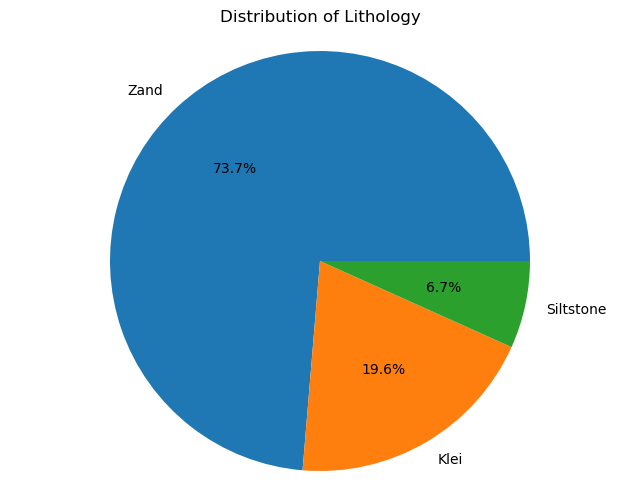

In [7]:
# Calculate value counts
value_counts = df_combined['Lithology1'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Lithology')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
#make a list with all unique values in Lithology1
lithology1 = df_combined['Lithology1'].unique().tolist()

#make a list with all unique values in Lithology2
lithology2 = df_combined['Lithology2'].unique().tolist()
lithology2[0]=str(lithology2[0])

for a in lithology1:

    #make list
    var_name = 'value_' + a.lower()
    globals()[var_name]=[]

    #add nan
    globals()[var_name].append(df_combined[(df_combined['Lithology1'] == a) & (df_combined['Lithology2'].isna())].shape[0])

    #add other values
    for b in range(1,len(lithology2)):
        globals()[var_name].append(df_combined[(df_combined['Lithology1'] == a) & (df_combined['Lithology2'] == lithology2[b])].shape[0])

#convert data in 7 value rows to plot and add them to a dictionary

values_dict = {}

for i,b in zip(range(0,len(lithology2)),lithology2):

    #make the list
    var_name = 'values' + b.lower()
    globals()[var_name]=[]

    #fill the list the the correct values
    for a in lithology1:
        globals()[var_name].append(globals()['value_' + a.lower()][i])

    #add them to a dictionary
    values_dict[b.lower()] = globals()[f'values{b.lower()}']

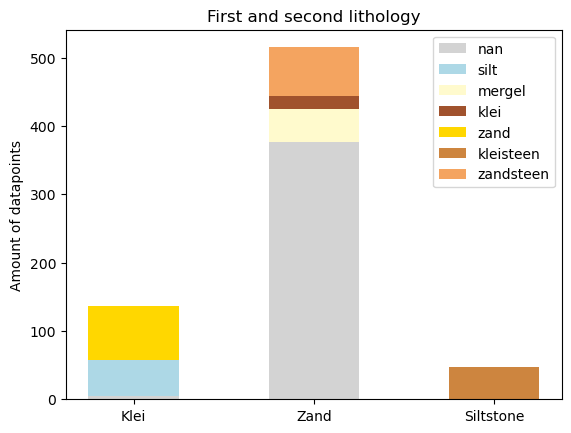

In [9]:
# Example colors for each category
colors = ['lightgrey', 'lightblue', 'lemonchiffon', 'sienna', 'gold', 'peru', 'sandybrown']

# Create the bar plot
fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.5

for i, (boolean, weight_count) in enumerate(values_dict.items()):
    p = ax.bar(lithology1, weight_count, width, label=boolean, bottom=bottom, color=colors[i])
    bottom += np.array(weight_count)

ax.set_title("First and second lithology")
ax.set_ylabel('Amount of datapoints')
ax.legend(loc="upper right")

plt.show()


## Lithology 1

In [10]:
for i in lithology1:
        
    #create name new df (without capitals)
    var_name = 'df_' + i.lower()
    globals()[var_name] = df_combined[(df_combined['Lithology1'] == i)]

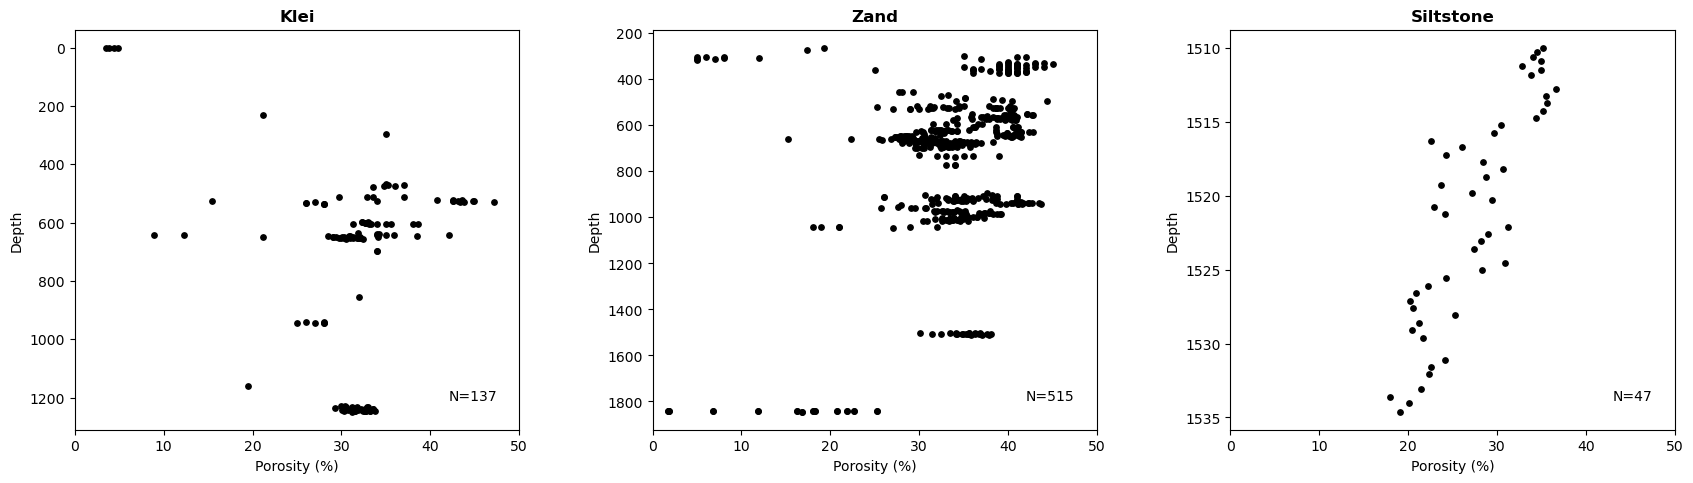

In [11]:
#create a scatterplot for a dataframes
fig, axs = plt.subplots(1, 3,figsize=(20, 5))

for i,a in zip(lithology1,[0,1,2]):

    #create name (without capitals)
    var_name = 'df_' + i.lower()

    axs[a].scatter(globals()[var_name]['POROSITY'],globals()[var_name]['DEPTH'], color='black', s=15)

    #set axis the same
    axs[a].set_xlim(0,50)
    # axs[a].set_ylim(0, 1550)
    
    #reverse y-axis because we talk about depth
    axs[a].invert_yaxis()

    #set labels
    axs[a].set_xlabel('Porosity (%)')
    axs[a].set_ylabel('Depth')
    axs[a].set_title(i,fontweight='bold')

    #name N
    N = len(globals()[var_name])
    axs[a].text(0.95, 0.1, f'N={N}', 
            horizontalalignment='right', verticalalignment='top', 
            transform=axs[a].transAxes, fontsize=10)

#plot layout
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show the plots
plt.show()

## Zand en klei lithology 1 and 2

In [12]:
#create dataframes based on Lithology1
category1=['Zand','Zand','Zand']
category2=['Zandsteen', 'Mergel','Klei']

for y,z in zip(category1,category2):
        
    #create name new df (without capitals)
    var_name = 'df_' + y.lower() + z.lower()
    
    if z != 'NaN':
        #create df
        globals()[var_name] = df_combined[(df_combined['Lithology1'] == y) & (df_combined['Lithology2'] == z)]
    else:
        globals()[var_name] = df_combined[(df_combined['Lithology1'] == y) & (df_combined['Lithology2'].isna())]

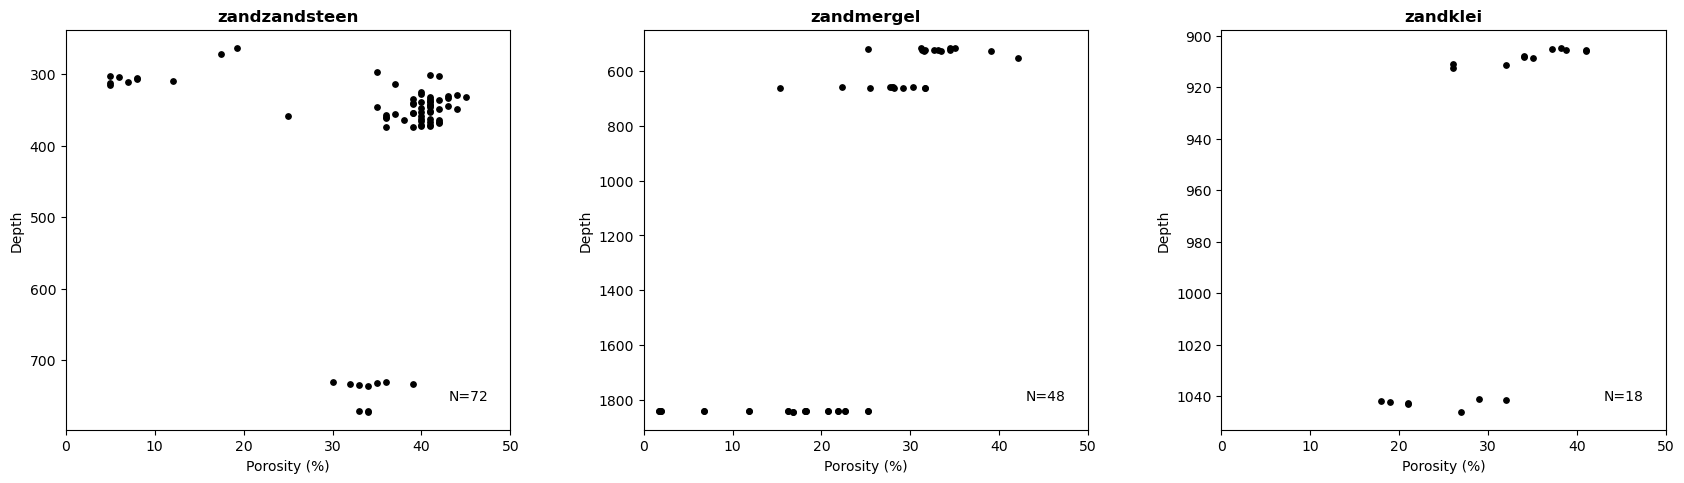

In [13]:
#create a scatterplot for a dataframes
fig, axs = plt.subplots(1, 3,figsize=(20, 5))

for y,z,a in zip(category1,category2,[0,1,2]):

    #create name (without capitals)
    var_name = 'df_' + y.lower()+ z.lower()

    axs[a].scatter(globals()[var_name]['POROSITY'],globals()[var_name]['DEPTH'], color='black', s=15)

    #set axis the same
    axs[a].set_xlim(0,50)
    # axs[a].set_ylim(0, 1550)
    
    #reverse y-axis because we talk about depth
    axs[a].invert_yaxis()

    #set labels
    axs[a].set_xlabel('Porosity (%)')
    axs[a].set_ylabel('Depth')
    axs[a].set_title(y.lower()+ z.lower(),fontweight='bold')

    #name N
    N = len(globals()[var_name])
    axs[a].text(0.95, 0.1, f'N={N}', 
            horizontalalignment='right', verticalalignment='top', 
            transform=axs[a].transAxes, fontsize=10)

#plot layout
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show the plots
plt.show()

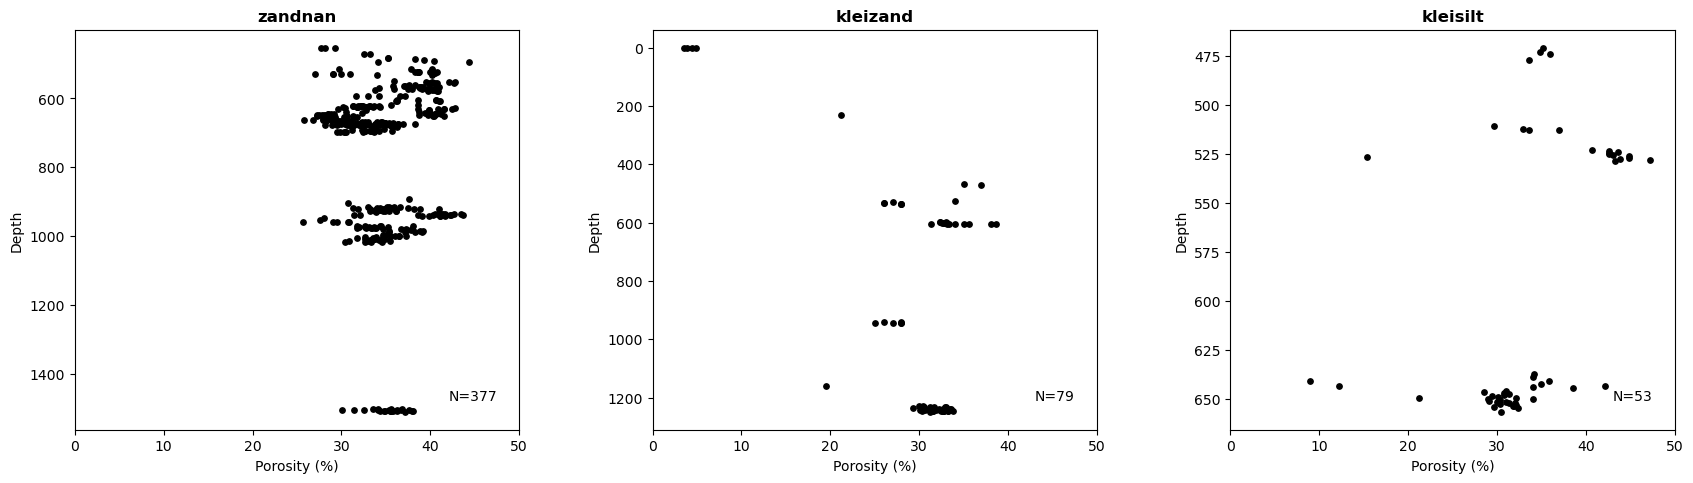

In [14]:
#create dataframes based on Lithology1
category1=['Zand','Klei','Klei']
category2=['NaN', 'Zand','Silt']

for y,z in zip(category1,category2):
        
    #create name new df (without capitals)
    var_name = 'df_' + y.lower() + z.lower()
    
    if z != 'NaN':
        #create df
        globals()[var_name] = df_combined[(df_combined['Lithology1'] == y) & (df_combined['Lithology2'] == z)]
    else:
        globals()[var_name] = df_combined[(df_combined['Lithology1'] == y) & (df_combined['Lithology2'].isna())]

#create a scatterplot for a dataframes
fig, axs = plt.subplots(1, 3,figsize=(20, 5))

for y,z,a in zip(category1,category2,[0,1,2]):

    #create name (without capitals)
    var_name = 'df_' + y.lower()+ z.lower()

    axs[a].scatter(globals()[var_name]['POROSITY'],globals()[var_name]['DEPTH'], color='black', s=15)

    #set axis the same
    axs[a].set_xlim(0,50)
    # axs[a].set_ylim(0, 1550)
    
    #reverse y-axis because we talk about depth
    axs[a].invert_yaxis()

    #set labels
    axs[a].set_xlabel('Porosity (%)')
    axs[a].set_ylabel('Depth')
    axs[a].set_title(y.lower()+ z.lower(),fontweight='bold')

    #name N
    N = len(globals()[var_name])
    axs[a].text(0.95, 0.1, f'N={N}', 
            horizontalalignment='right', verticalalignment='top', 
            transform=axs[a].transAxes, fontsize=10)

#plot layout
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show the plots
plt.show()

## Fit curve

### Dummy test data

In [15]:
#create dummy data random

# Set seed for reproducibility
np.random.seed(42)

# Create an empty list to store dataframes
df_list = []

#I want to create random data in three steps to decrease the porosity with depth without a clear set decay
for min_depth, max_depth, min_porosity, max_porosity in zip([0, 200, 600], [250, 700, 1000], [20, 5, 5], [60, 30, 25]):

    # Number of data points
    num_points = 100
    
    # Generate random depth values within a specified range
    depth = np.random.uniform(min_depth, max_depth, num_points)
    
    # Generate random porosity values within a specified range
    porosity = np.random.uniform(min_porosity, max_porosity, num_points)

    # Create a temporary DataFrame for the current step
    temp_df = pd.DataFrame({'DEPTH': depth, 'POROSITY': porosity})
    
    # Append the temporary DataFrame to the list
    df_list.append(temp_df)

# Concatenate all DataFrames in the list
dummy_data = pd.concat(df_list, ignore_index=True)

In [16]:
#create dummy data with exponential decay
# Let's assume Phi_zero is given
Phi_zero = 40

# Generate some dummy data
np.random.seed(42)
num_points = 100
depth = np.linspace(0, 1000, num_points)
porosity = Phi_zero * np.exp(-depth / 100)  # Assuming decay constant c = 100

# Add some random noise to porosity values for variation
porosity += np.random.normal(scale=5, size=num_points)

# Create a DataFrame to store the data
dummy_data_exp = pd.DataFrame({'DEPTH': depth, 'POROSITY': porosity})


### Plot codes

In [17]:
def plot_basic(df,z='DEPTH',y='POROSITY', title="Plot 1"):
    plt.figure(figsize=(10,6))
    plt.scatter(df[z],df[y], color='black', s=15, label='Datapoints')

    #axis
    # plt.xlim(0,50)
    # plt.ylim(0, 1550)
    # plt.gca().invert_yaxis()    #reverse y-axis because we talk about depth
    
    #set labels
    plt.xlabel(z)
    plt.ylabel(y)
    plt.title(title,fontweight='bold')
    
    #calculate N
    N = len(globals()[var_name])
    plt.text(0.1, 0.1, f'N={N}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10); 

In [18]:
def plot_linearregression(df, z='DEPTH', y='POROSITY', color='black', linestyle='--', alpha=0.1):
    
    # Initiate linear regression model
    model = LinearRegression()

    # Convert x and y to NumPy arrays
    Z = np.array(df[z]).reshape(-1, 1)  # Reshape x to make it a 2D array if it's 1D
    Y = np.array(df[y])       

    # Fit regression model
    model.fit(Z, Y)

    # Get the coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_

    # Plot the line using the coefficients
    z_line = np.array([Z.min(), Z.max()])
    y_line = intercept + coefficients[0] * z_line

    # Calculate equation
    equation = f'y = {intercept:.2f} + {coefficients[0]:.2f} * z'

    #-------------------------------------------------
    #calculate p-value
    # Add a constant to the independent variable (required for statsmodels)
    Z_with_const = sm.add_constant(Z)

    # Fit the linear regression model
    model_sm = sm.OLS(Y, Z_with_const).fit()

    # Get the p-value for the coefficient of the independent variable
    p_value = model_sm.pvalues[1]  # p-value for the coefficient of z

    #-------------------------------------------------

    # Print equation and R-squared
    print("\033[1mLinear regression line\033[0m")
    print(equation)

    # Plot only if p-value meets a certain threshold (e.g., 0.1)
    if p_value < alpha:
        # Get R-squared from statsmodels
        r_squared = model_sm.rsquared
        
        plt.plot(z_line, y_line, color=color, linestyle=linestyle, label='Linear Regression Line')
        plt.xlabel(z)
        plt.ylabel(y)
        plt.legend()
        print("P-value={:.4f}".format(p_value))
        print("R-squared={:.4f}".format(r_squared))
    else:
        print("P_value= {:.4f}".format(p_value))
        print("P-value is too high to plot.")

    # Show legend
    plt.legend()
        

In [19]:
def exponential_decay(df, z='DEPTH', y='POROSITY', color='green', linestyle='-', alpha=0.1):
    # Define the exponential decay function
    def exponential_decay(depth, Phi_zero, c):
        return Phi_zero * np.exp(-depth / c)

    print("\033[1mPower decay\033[0m")


    with warnings.catch_warnings():
        warnings.simplefilter("error", category=OptimizeWarning)
        try:
            # This line is expected to raise an OptimizeWarning if it occurs in formula 1
            popt, pcov = curve_fit(exponential_decay, df[z], df[y])

        except OptimizeWarning:
            # If OptimizeWarning occurs, use formula 2 instead
            popt, pcov = curve_fit(exponential_decay, df[z], df[y], method='trf')
            print("Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).")
    
    # Create equation
    equation = f'Porosity = {popt[0]:.2f} * exp(-z / {popt[1]:.2f})'

    #--------------------------------------------

    # Calculate R-squared value
    residuals = df[y] - exponential_decay(df[z], *popt)
    ss_residuals = np.sum(residuals**2)
    ss_total = np.sum((df[y] - np.mean(df[y]))**2)
    r_squared = 1 - (ss_residuals / ss_total)
    
    #--------------------------------------------
    
    dof = len(df[z]) - len(popt)

    # Residual mean square
    mean_sq_residuals = ss_residuals / dof

    # Calculate F-statistic for the fit
    f_statistic = (ss_total - ss_residuals) / mean_sq_residuals

    # Calculate p-value using the F-distribution
    p_value = 1 - stats.f.cdf(f_statistic, 1, dof)

   
    print(equation)
    
    # Plot only if p-value meets a certain threshold (e.g., 0.8)
    if p_value<=alpha:
        plt.plot(df[z], exponential_decay(df[z], *popt), color=color, linestyle=linestyle, label='Exponential Decay Fit')
        plt.xlabel(z)
        plt.ylabel(y)
        plt.legend()
        print("P-value={:.4f}".format(p_value))
        print("R-squared= {:.4f}".format(r_squared))
    else:
        print("P_value= {:.4f}".format(p_value))
        print("P-value is too high to plot.")


In [20]:
def exponential_decay_Elco_flip(df, z='DEPTH', y='POROSITY', color='red', linestyle=':', alpha=0.1):
    def integrate_exp_func(phi0, beta, z):
        return -(phi0 / (- beta) * np.exp(-beta * z))
    
    # Set boundaries and fit the exponential decay function to the data
    phi0_min = np.min(df[y])
    phi0_max = np.max(df[y])
    z_min = np.min(df[z])
    z_max = np.max(df[z])
    beta_min = -200
    beta_max = 200
    
    popt, pcov = curve_fit(integrate_exp_func, df[z], df[y], bounds=([phi0_min, beta_min], [phi0_max, beta_max]))
    
    # Calculate R-squared value
    residuals = df[y] - integrate_exp_func(*popt, df[z])
    ss_residuals = np.sum(residuals**2)
    ss_total = np.sum((df['POROSITY'] - np.mean(df[y]))**2)
    r_squared = 1 - (ss_residuals / ss_total)

    # Create equation
    equation = f'Porosity = {popt[0]:.2f} / (- {popt[1]:.2f}) * exp(-{popt[1]:.2f} * z)'

    print("\033[1mExponential Decay Elco flip\033[0m")
    dof = len(df[z]) - len(popt)

    # Residual mean square
    mean_sq_residuals = ss_residuals / dof

    # Calculate F-statistic for the fit
    f_statistic = (ss_total - ss_residuals) / mean_sq_residuals

    # Calculate p-value using the F-distribution
    p_value = 1 - stats.f.cdf(f_statistic, 1, dof)

   
    print(equation)
    
    # Plot only if p-value meets a certain threshold (e.g., 0.8)
    if p_value<=alpha:
        plt.plot(df[z], integrate_exp_func(*popt, df[z]), color=color,linestyle=linestyle, label='Exponential Decay Elco flip')
        plt.xlabel(z)
        plt.ylabel(y)
        plt.legend()
        print("P-value={:.4f}".format(p_value))
        print("R-squared= {:.4f}".format(r_squared))
    else:
        print("P_value= {:.4f}".format(p_value))
        print("P-value is too high to plot.")



In [21]:
def power_law_curve(df, z='DEPTH', y='POROSITY', color='purple', linestyle='-.', alpha=0.1, power_law_plot='on'):
     
    if power_law_plot.lower()!='on' and power_law_plot.lower()!='off':
        print("ERROR: does not regonize power_law_plot input. Choose 'on' or 'off'.")
    
    def power_law(x, a, b):
        return a * np.power(x, b)

    print("\033[1mPower law curve\033[0m")

    with warnings.catch_warnings():
        warnings.simplefilter("error", category=RuntimeWarning)
        try:
             # Fit the curve
            popt, pcov = curve_fit(power_law, df[z], df[y])
            
            # Extract the fitted parameters
            a_fit, b_fit = popt
            
            # Generate points for the fitted curve
            x_fit = np.linspace(min(df[z]), max(df[z]), 100)
            y_fit = power_law(x_fit, a_fit, b_fit)

            # Predicted values from the fitted curve
            y_pred = power_law(df[z], *popt)

            # Calculate R-squared
            ss_residuals = np.sum((df[y] - y_pred) ** 2)
            ss_total = np.sum((df[y] - np.mean(df[y]))**2)
            r_squared = 1 - (ss_residuals / ss_total)
            
            #------------------------------
            #Calculate p_value
    
            # Degrees of freedom
            dof = len(df[z]) - len(popt)

            # Residual mean square
            mean_sq_residuals = ss_residuals / dof
    
            # Calculate F-statistic for the fit
            f_statistic = (ss_total - ss_residuals) / mean_sq_residuals
    
            # Calculate p-value using the F-distribution
            p_value = 1 - stats.f.cdf(f_statistic, 1, dof)

        
            # Construct the equation
            equation = f'Porosity = {a_fit:.2f} * z^{b_fit:.2f}'
        
            print(equation)
            
            # Plot only if R-squared meets a certain threshold (e.g., 0.8)
            if p_value<=alpha and power_law_plot.lower()=='on':
                plt.plot(df[z], power_law(df[z], *popt), color=color, linestyle=linestyle, label='Power law curve')
                plt.xlabel(z)
                plt.ylabel(y)
                plt.legend()
                print("P-value={:.4f}".format(p_value))
                print("R-squared= {:.4f}".format(r_squared))
                
                if (b_fit<=0.3) and (b_fit<=-0.3):
                    print('Parameter b is close to zero, the fitted line might zigzag')

            elif p_value<=alpha and power_law_plot.lower()=='off':
                print("P_value= {:.4f}".format(p_value))
                print("R-squared= {:.4f}".format(r_squared))
                print("Power law curve plot is 'off'")

                if (b_fit<=0.3) and (b_fit<=-0.3):
                    print('Parameter b is close to zero, the fitted line might zigzag')

            else:
                print("P_value= {:.4f}".format(p_value))
                print("P-value is too high to plot.")

        except RuntimeError as e:
            print('RuntimeError:', e)


The p-value represents the statistical significance of the fit of the hyperbolic curve compared to a null hypothesis where there is no relationship between the variables. And for all other lines which are not linear. 

In [22]:
def hyperbolic_curve(df, z='DEPTH', y='POROSITY', color='orange', linestyle=':', alpha=0.1, hyperbolic_curve_plot='on'):

    if hyperbolic_curve_plot.lower() != 'on' and hyperbolic_curve_plot.lower() != 'off':
        print("ERROR: does not recognize hyperbolic_curve_plot input. Choose 'on' or 'off'.")
    
    # Define the hyperbolic function
    def hyperbolic_(x, a, b):
        return a / (b + x)
    
    # Fit the curve
    popt, pcov = curve_fit(hyperbolic_, df[z], df[y])
    
    # Extract the fitted parameters
    a_fit, b_fit = popt
    
    # Generate points for the fitted curve
    x_fit = np.linspace(min(df[z]), max(df[z]), 100)
    y_fit = hyperbolic_(x_fit, a_fit, b_fit)

    # Predicted values from the fitted curve
    y_pred = hyperbolic_(df[z], *popt)
    
    
    ss_residuals = np.sum((df[y] - y_pred) ** 2)
    ss_total = np.sum((df[y] - np.mean(df[y])) ** 2)
    r_squared = 1 - (ss_residuals / ss_total)

    #----------------------------
    #calculate p-value
     # Degrees of freedom
    dof = len(df[z]) - len(popt)
    
    # Residual mean square
    mean_sq_residuals = ss_residuals / dof
    
    f_statistic = (ss_total - ss_residuals) / mean_sq_residuals
    
    # Calculate p-value using the F-distribution
    p_value = 1 - stats.f.cdf(f_statistic, 1, dof)
        
    
    # Construct the equation
    equation = f'Porosity = {a_fit:.2f} * z^{b_fit:.2f}'

    print("\033[1mHyperbolic curve\033[0m")
    print(equation)
    
    # Plot only if R-squared meets a certain threshold (e.g., 0.8)
    if p_value<=alpha and hyperbolic_curve_plot.lower()=='on':
        plt.plot(df[z], hyperbolic_(df[z], *popt), color=color, linestyle=linestyle, label='Hyperbolic curve')
        plt.xlabel(z)
        plt.ylabel(y)
        plt.legend()
        print("P-value={:.4f}".format(p_value))
        print("R-squared= {:.4f}".format(r_squared))
    elif p_value<=alpha and hyperbolic_curve_plot.lower()=='off':
                print("P-value={:.4f}".format(p_value))
                print("R-squared= {:.4f}".format(r_squared))
                print("Hyperbolic curve plot is 'off'")

    else:
        print("P_value= {:.4f}".format(p_value))
        print("P-value is too high to plot.")


Plot 1
Linear regression line
y = 13.22 + -0.02 * z
P-value=0.0000
R-squared=0.3153
Power decay
Porosity = 45.12 * exp(-z / 81.33)
P-value=0.0000
R-squared= 0.8023
Exponential Decay Elco flip
Porosity = 14.75 / (- 0.32) * exp(-0.32 * z)
P-value=0.0140
R-squared= 0.0600
Power law curve
Porosity = 2.22 * z^0.00
P_value= 1.0000
P-value is too high to plot.
Hyperbolic curve
Porosity = 1415.79 * z^28.32
P-value=0.0000
R-squared= 0.6966


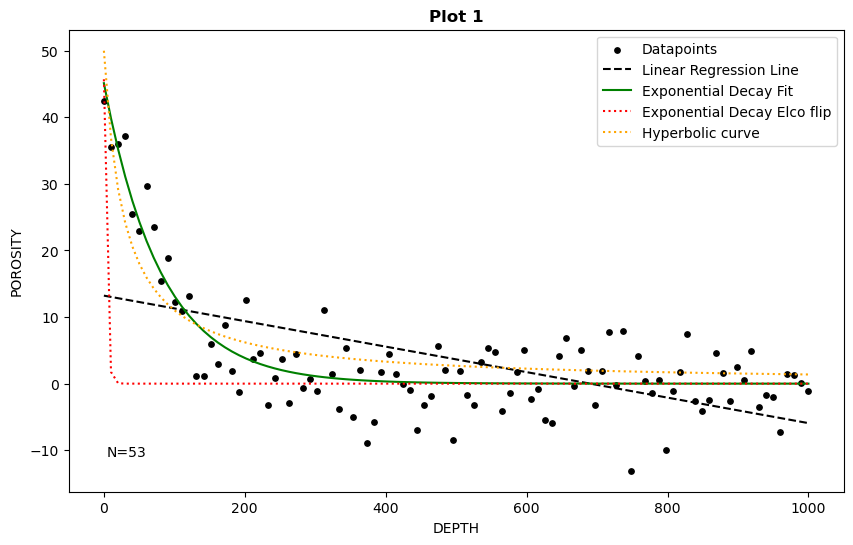

In [23]:
def plot_all(data_plot,title='Plot 1', alpha=0.1, power_law_plot='on', hyperbolic_curve_plot='on'):
    
    print("\033[4m{}\033[0m".format(title))
    
    plot_basic(data_plot, title=title)
    plot_linearregression(data_plot, alpha=alpha)
    exponential_decay(data_plot, alpha=alpha)
    exponential_decay_Elco_flip(data_plot, alpha=alpha)
    power_law_curve(data_plot, alpha=alpha, power_law_plot=power_law_plot)
    hyperbolic_curve(data_plot, alpha=alpha, hyperbolic_curve_plot=hyperbolic_curve_plot)  
    plt.show()
    
plot_all(dummy_data_exp)

## Plot all data

In [24]:
# Get a list of all variables in the current namespace
all_vars = globals()

# Filter DataFrame object names from all variables
list_dataframe = [var_name for var_name, var in all_vars.items() if isinstance(var, pd.DataFrame)]

# Names of items to drop
items_to_drop = ['df', 'df_code','df_combined','temp_df','dummy_data','dummy_data_exp']

# Drop items with specific names
list_df = [item for item in list_dataframe if item not in items_to_drop]

# Print the list of DataFrame object names
print(list_df)

['df_klei', 'df_zand', 'df_siltstone', 'df_zandzandsteen', 'df_zandmergel', 'df_zandklei', 'df_zandnan', 'df_kleizand', 'df_kleisilt']


df_klei
Linear regression line
y = 28.72 + 0.00 * z
P-value=0.0554
R-squared=0.0269
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 5.55 * exp(-z / 3.52)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 25.35 / (- 0.01) * exp(-0.01 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 14.23 * z^0.12
P_value= 0.0000
R-squared= 0.2894
Power law curve plot is 'off'
Hyperbolic curve
Porosity = 446612639565.57 * z^14184160360.87
P_value= 1.0000
P-value is too high to plot.


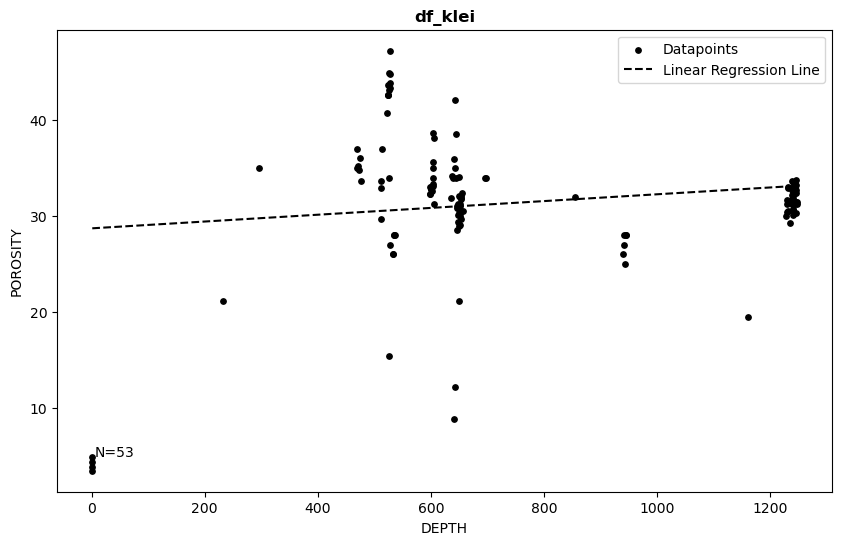

df_zand
Linear regression line
y = 39.59 + -0.01 * z
P-value=0.0000
R-squared=0.1434
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 23.35 / (- 0.01) * exp(-0.01 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 80.35 * z^-0.13
P_value= 0.0000
R-squared= 0.0735
Power law curve plot is 'off'
Hyperbolic curve
Porosity = 446.43 * z^-267.76
P_value= 1.0000
P-value is too high to plot.


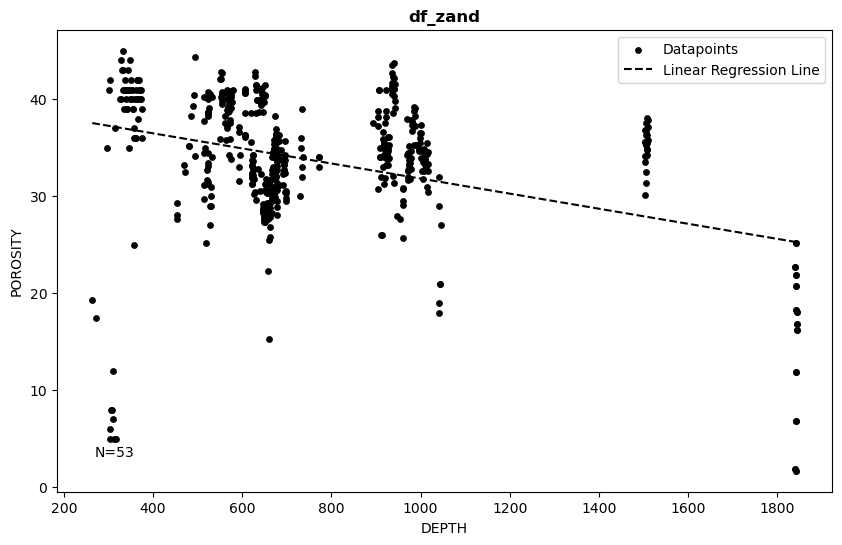

df_siltstone
Linear regression line
y = 992.62 + -0.63 * z
P-value=0.0000
R-squared=0.7312
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 27.30 / (- 0.03) * exp(-0.03 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
Hyperbolic curve
Porosity = 1152.55 * z^-1477.92
P-value=0.0000
R-squared= 0.7415
Hyperbolic curve plot is 'off'


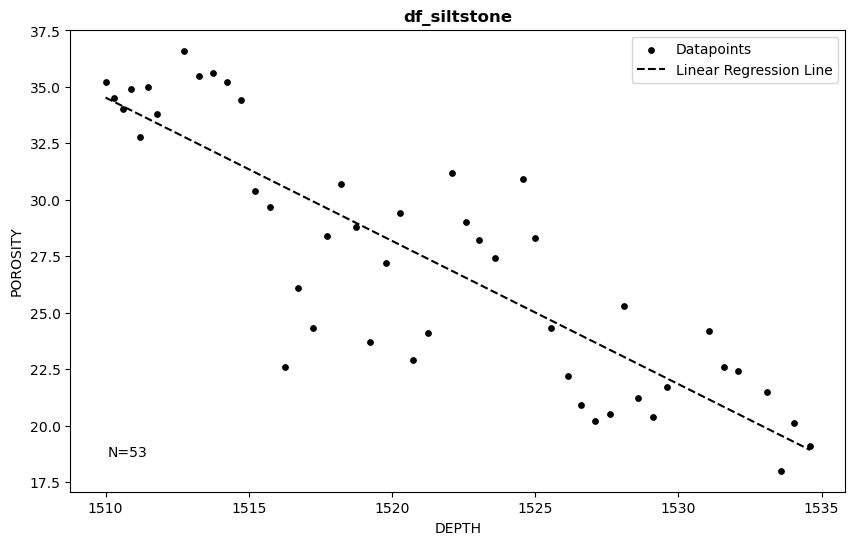

df_zandzandsteen
Linear regression line
y = 32.68 + 0.01 * z
P_value= 0.5625
P-value is too high to plot.
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 25.00 / (- -0.03) * exp(--0.03 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 17.12 * z^0.12
P_value= 0.3278
P-value is too high to plot.
Hyperbolic curve
Porosity = 102848466419.84 * z^2955297375.60
P_value= 1.0000
P-value is too high to plot.


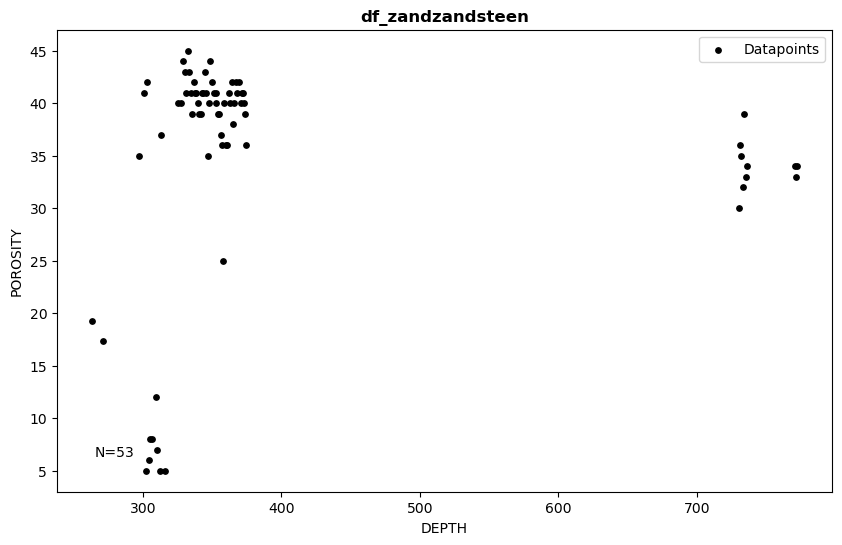

df_zandmergel
Linear regression line
y = 37.93 + -0.01 * z
P-value=0.0000
R-squared=0.6012
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 21.91 / (- 0.06) * exp(-0.06 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 1553.21 * z^-0.62
P_value= 0.0000
R-squared= 0.6201
Power law curve plot is 'off'
Parameter b is close to zero, the fitted line might zigzag
Hyperbolic curve
Porosity = 36482.72 * z^604.82
P-value=0.0000
R-squared= 0.6156
Hyperbolic curve plot is 'off'


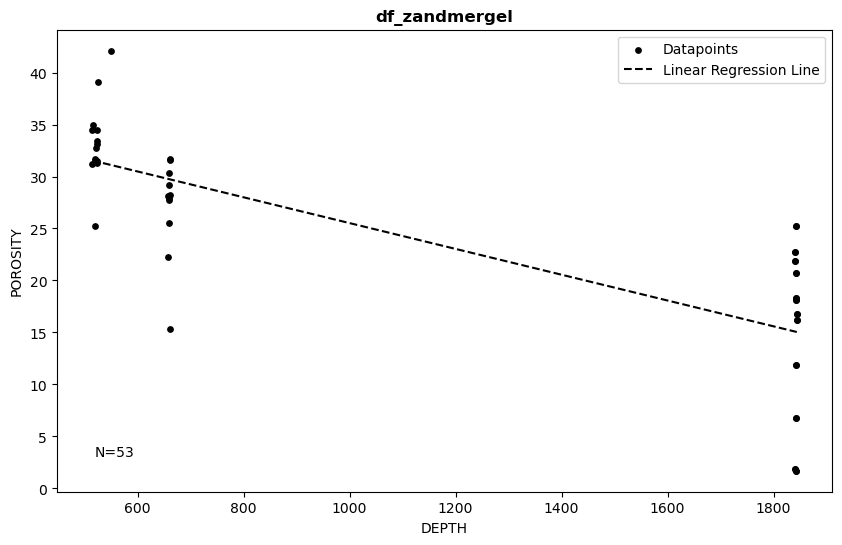

df_zandklei
Linear regression line
y = 110.38 + -0.08 * z
P-value=0.0004
R-squared=0.5552
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 29.50 / (- 0.00) * exp(-0.00 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
Hyperbolic curve
Porosity = 9731.95 * z^-629.84
P-value=0.0003
R-squared= 0.5653
Hyperbolic curve plot is 'off'


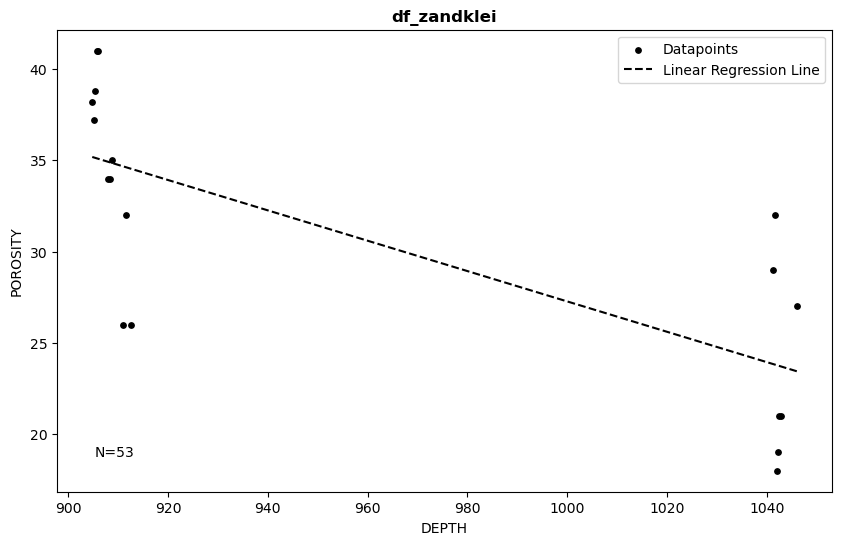

df_zandnan
Linear regression line
y = 34.76 + 0.00 * z
P_value= 0.8928
P-value is too high to plot.
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 35.05 / (- -0.01) * exp(--0.01 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 36.12 * z^-0.01
P_value= 0.8009
P-value is too high to plot.
Hyperbolic curve
Porosity = 5.21 * z^-659.30
P_value= 1.0000
P-value is too high to plot.


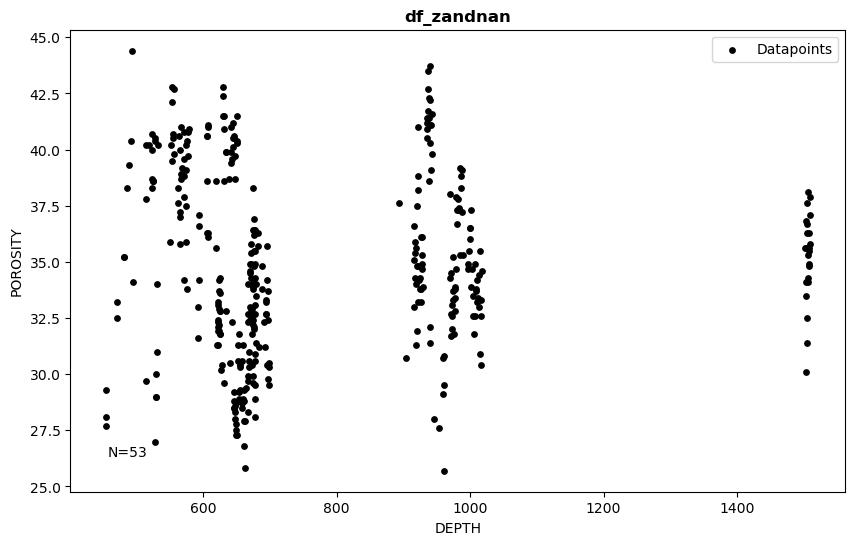

df_kleizand
Linear regression line
y = 21.82 + 0.01 * z
P-value=0.0000
R-squared=0.2563
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 5.55 * exp(-z / 3.52)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 21.05 / (- 0.02) * exp(-0.02 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 10.06 * z^0.17
P_value= 0.0000
R-squared= 0.6799
Power law curve plot is 'off'
Hyperbolic curve
Porosity = 6793.78 * z^-155.83
P_value= 1.0000
P-value is too high to plot.


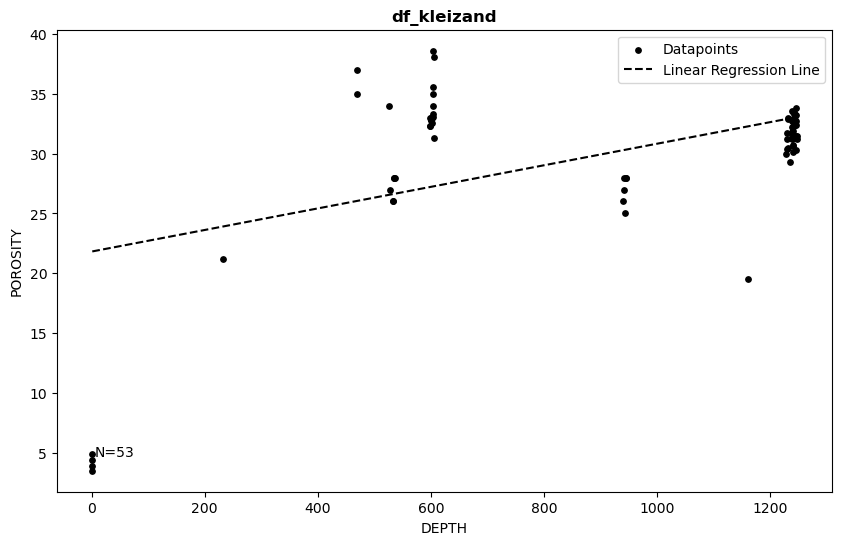

df_kleisilt
Linear regression line
y = 64.33 + -0.05 * z
P-value=0.0006
R-squared=0.2104
Power decay
Covariance of the parameters could not be estimated. Using alternative method: Trust Region Reflective method (trf).
Porosity = 1.00 * exp(-z / 1.00)
P_value= 1.0000
P-value is too high to plot.
Exponential Decay Elco flip
Porosity = 28.05 / (- -0.02) * exp(--0.02 * z)
P_value= 1.0000
P-value is too high to plot.
Power law curve
Porosity = 6233.06 * z^-0.82
P_value= 0.0009
R-squared= 0.1973
Power law curve plot is 'off'
Parameter b is close to zero, the fitted line might zigzag
Hyperbolic curve
Porosity = 24224.73 * z^133.41
P-value=0.0008
R-squared= 0.1988
Hyperbolic curve plot is 'off'


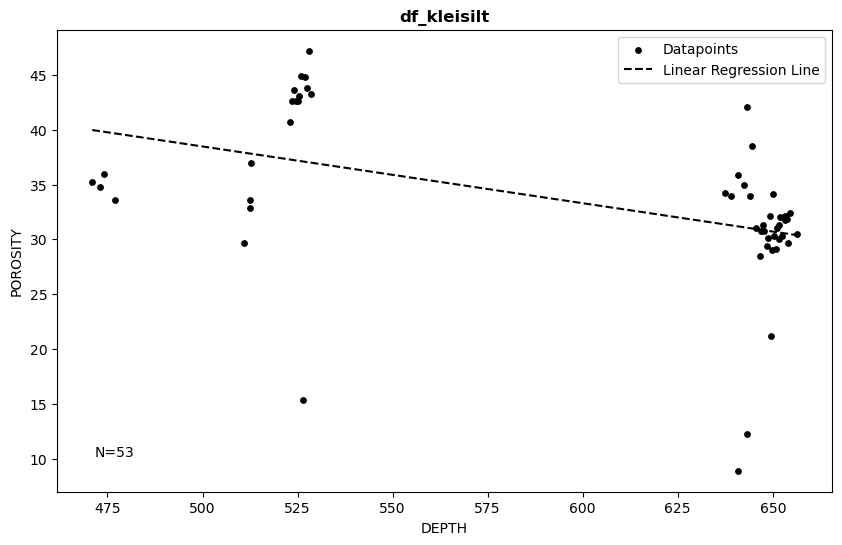

In [25]:
for df_name in list_df:
    plot_all(globals()[df_name],title=df_name, alpha=0.1, power_law_plot='off', hyperbolic_curve_plot='off')

In [26]:
df_kleizand.nsmallest(5, 'POROSITY')

,NITG_NR,UWI,SHORT_NM,DEPTH,POROSITY,HOR_PERMEABILITY,GRAIN_DENSITY,VERT_PERMEABILITY,FORMATION_FACTOR,ANALYSIS_NR,...,STRAT_UNIT_NM_y,Code,Group,Formatie,Laagpakket,Lithology1,Lithology2,Lithology3,Afzettingsmilieu1,Afzettingsmilieu2
188,BL070154,7264,L07-01,1.00,3.5,NaN,2.74,NaN,NaN,0151#1,...,Upper North Sea Group,NU,Boven-Noordzee,NaN,NaN,Klei,Zand,Veen,Ondiep marien,NaN
189,BL070154,7264,L07-01,1.00,3.9,NaN,2.72,NaN,NaN,0153#1,...,Upper North Sea Group,NU,Boven-Noordzee,NaN,NaN,Klei,Zand,Veen,Ondiep marien,NaN
190,BL070154,7264,L07-01,1.00,4.4,NaN,2.71,NaN,NaN,0155#1,...,Upper North Sea Group,NU,Boven-Noordzee,NaN,NaN,Klei,Zand,Veen,Ondiep marien,NaN
187,BL070154,7264,L07-01,1.00,4.9,NaN,2.71,NaN,NaN,0149#1,...,Upper North Sea Group,NU,Boven-Noordzee,NaN,NaN,Klei,Zand,Veen,Ondiep marien,NaN
165,BA120016,7001,A12-01,1160.37,19.5,0.06,NaN,NaN,NaN,0028#1,...,Upper North Sea Group,NU,Boven-Noordzee,NaN,NaN,Klei,Zand,Veen,Ondiep marien,NaN


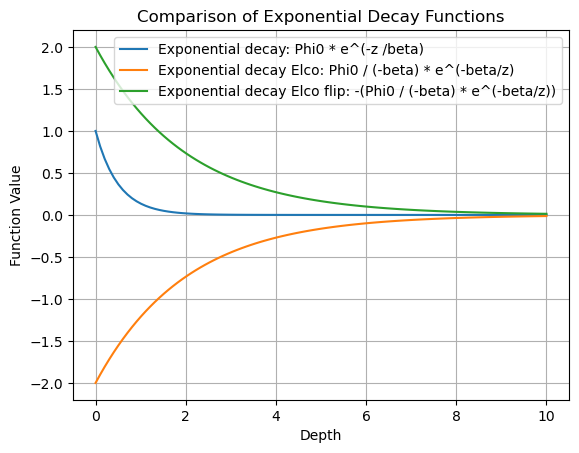

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
phi0 = 1.0
beta = 0.5
z = np.linspace(0, 10, 100)

# Define functions
function1 = phi0 * np.exp(-z / beta)
function2 = phi0 / (-beta) * np.exp(-beta * z)
function3 = -(phi0 / (-beta) * np.exp(-beta * z))

# Plot the functions
plt.plot(z, function1, label='Exponential decay: Phi0 * e^(-z /beta)')
plt.plot(z, function2, label='Exponential decay Elco: Phi0 / (-beta) * e^(-beta/z)')
plt.plot(z, function3, label='Exponential decay Elco flip: -(Phi0 / (-beta) * e^(-beta/z))')
plt.xlabel('Depth')
plt.ylabel('Function Value')
plt.title('Comparison of Exponential Decay Functions')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# #calculate first guesses
# z = df[z].values
# y = df[y].values
# #mean first x points
# index_sort_begin=np.argsort(z)[:20] #returns index of how to sort
# Phi_zero= np.mean(y[index_sort_begin]) #argsort finds the lowest depth points

# #mean of lowest x points
# index_sort_end=np.argsort(-z)[:20] #returns index of how to sort
# deepest_porosity= np.mean(y[index_sort_end]) #argsort finds the lowest depth points

# #mean of highest and lowest points
# mean_high = np.mean(z[index_sort_end])
# mean_low = np.mean(z[index_sort_begin])

#guess c: delta porosity/delta depth
#guess_c = (deepest_porosity-Phi_zero)/(mean_high-mean_low)

# Data: iodp_data_warehouse_search_porosity_14oct21

In [29]:
#load file
path_df = os.path.join(folder+input_data, "iodp_data_warehouse_search_porosity_14oct21.tab")
df_iodp1 = pd.read_csv(path_df, delimiter='\t')  # If tab-separated

df_iodp = df_iodp1

/var/folders/5j/zg267_rx6m51dx0w50xx4rn00000gn/T/ipykernel_17405/630949814.py:3: DtypeWarning: Columns (7,9,10,12,15,22,24,25,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_iodp1 = pd.read_csv(path_df, delimiter='\t')  # If tab-separated


In [30]:
# #load files
# #load file
# path_df = os.path.join(folder+input_data, "iodp_data_warehouse_search_porosity_14oct21.tab")
# df_iodp1 = pd.read_csv(path_df, delimiter='\t')  # If tab-separated
# path_df = os.path.join(folder+input_data, "iodp_data_waterhouse_eff_stress_data_14dec21.tab")
# df_iodp2 = pd.read_csv(path_df, delimiter='\t')  # If tab-separated
# df_iodp = pd.concat([df_iodp1, df_iodp2], ignore_index=True)

# #Find overlapping columns
# overlapping_columns = set(df_iodp1.columns).intersection(df_iodp2.columns)

# # Print overlapping columns
# print("Overlapping columns:", overlapping_columns)

# # Count the non-null values in the "Poros [% vol]" column
# porosity_count = df_iodp2["Poros [% vol]"].count()

# # Print the count
# print("Number of rows with a value for Poros [% vol]:", porosity_count)

In [31]:
#some porosity values have a # before them.
# Remove "#" character from porosity values and convert to numeric
df_iodp['Poros [% vol]'] = df_iodp['Poros [% vol]'].str.replace('#', '')
df_iodp['Poros [% vol]'] = pd.to_numeric(df_iodp['Poros [% vol]'], errors='coerce')

In [32]:
df_iodp.info()
# df_iodp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395213 entries, 0 to 395212
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Latitude              395210 non-null  float64
 1   Longitude             395210 non-null  float64
 2   Event Label           395210 non-null  object 
 3   Elevation [m a.s.l.]  393827 non-null  float64
 4   Depth [m]             367986 non-null  float64
 5   Date/Time             376473 non-null  object 
 6   Age [ka BP]           1181 non-null    float64
 7   Poros [% vol]         34426 non-null   float64
 8   Top [mbsf]            26984 non-null   float64
 9   Lithology             2147 non-null    object 
 10  Unit                  1042 non-null    object 
 11  k [10**-12 m**2]      2223 non-null    float64
 12  Rock                  252 non-null     object 
 13  Overb press ef [kPa]  306 non-null     float64
 14  Overb press [kPa]     141 non-null     float64
 15  

In [33]:
# #Keep working with all columns
# df=df_iodp.copy()

In [34]:
#Make a new df and drop na

# Create a new DataFrame with selected columns
df = df_iodp[["Poros [% vol]", "Depth [m]", "Lithology","Overb press ef [kPa]","Clay min [%]","<4 µm [%]", "Silt [%]", "Sand [%]","CaO [%]"]].copy()

# Remove rows with no porosity
df = df.dropna(subset=['Poros [% vol]']).copy()

# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

print(len(df_iodp))
print(len(df))

395213
34426


In [35]:
column_mapping = {"Poros [% vol]": 'porosity', 
                  "Depth [m]": 'depth',
                 "Lithology":'lithology',
                 "Overb press ef [kPa]":'overb_press'}

# Use the rename() function with the column mapping dictionary
df.rename(columns=column_mapping, inplace=True)


In [36]:
df["eff_stress_gradient"] = df["overb_press"] * 1e3 / df["depth"]
df["eff_stress_gradient"].describe()

eff_stress_gradient = df["eff_stress_gradient"].mean()

THe effective stress was calculated using:

$$\sigma_e = \sigma_b - P_f$$
where  is pore fluid pressure (Pa). Under normal hydrostatic conditions and  can be estimated as 
 
 where  is fluid density (kg m-3). The overburden stress

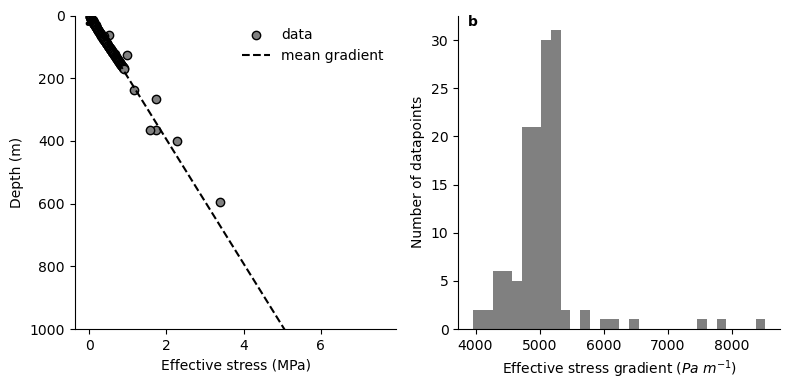

In [37]:
#make a plot
zplot = np.linspace(0, 1500, 1501)

eff_stress_calc = zplot * eff_stress_gradient

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(df['overb_press'] / 1e3, df["depth"], label="data", facecolor="gray", edgecolor="black")
axs[0].plot(eff_stress_calc / 1e6, zplot, label="mean gradient", color="black", ls="--", lw=1.5)

axs[0].set_ylim(axs[0].get_ylim()[-1], 0)

axs[0].set_ylabel("Depth (m)")

axs[0].set_xlabel("Effective stress (MPa)")

axs[0].legend(frameon=False)

axs[1].hist(df["eff_stress_gradient"], color="gray", bins=30)
axs[1].set_xlabel(r"Effective stress gradient ($Pa\;m^{-1}$)")
axs[1].set_ylabel("Number of datapoints")

axs[0].set_ylim(1000, 0)

for i, panel in enumerate(axs):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, ha='left', va='top')
    
fig.tight_layout()

In [38]:
# Get unique terms and their counts
unique_terms = df["lithology"].value_counts()

# Print unique terms along with their counts
for term, count in unique_terms.items():
    print(f"{term}: {count}")


Clayey silt: 40
Aphyric basalt: 18
Silty clay: 11
Silly clay: 10
Ooze: 9
Aphyric dolerite: 9
Clayey sill: 8
Turbidites bottom: 7
Turbidites top: 7
plagioclase-sparsely-phyric basalt: 4
Turbidite: 3
Sandy sill: 3
Turbidites middle: 3
Chalk: 3
olivine-sparsley-microphyric basalt: 2
Phyric basalt: 2
plagioclase-moderately-megaphyric basalt: 2
Debris flow: 2
Red, orange, and brown chert: 1
Brown laminated porcellanite: 1
Brown laminated chert: 1
Cemented grainstone: 1
Cemented rudstone: 1
Chert (silicified turbidite): 1
Lithified grainstone: 1
Poorly lithified grainstone: 1
Dolostone: 1
Silty sand: 1
Clayey silt, sandy silt: 1
Sill: 1
Claycv silt: 1
Sandstone: 1
Limestone: 1
olivine-plagioclase-sparsley-microphyric basalt: 1
olivine-pl-sparsley-microphyric basalt: 1
olivine-pl-m-phyric basalt: 1
plagiocalse-highly-megaphyric basalt: 1
Aphyric micro-dolerite: 1
Brown laminated porcellanite with chert nodule: 1


In [39]:
#for with porosity value
# dictonary based on chatgpt and own input
lithology_mapping = {
    "Clayey silt": "Clay/Silt",
    "Silty clay": "Clay/Silt",
    "Silly clay": "Clay/Silt",  # Assuming typo, meant to be Silty clay
    "Clayey sill": "Clay/Silt",
    "Silty sand": "Sand",
    "Sandy sill": "Sill",  # Changed to Sill based on structure
    "Aphyric basalt": "Basalt",
    "Plagioclase-sparsely-phyric basalt": "Basalt",
    "Olivine-sparsely-microphyric basalt": "Basalt",
    "Phyric basalt": "Basalt",
    "Plagioclase-moderately-megaphyric basalt": "Basalt",
    "Olivine-plagioclase-sparsely-microphyric basalt": "Basalt",
    "Olivine-pl-sparsely-microphyric basalt": "Basalt",
    "Olivine-pl-m-phyric basalt": "Basalt",
    "Plagioclase-highly-megaphyric basalt": "Basalt",
    "Aphyric dolerite": "Dolerite",
    "Aphyric micro-dolerite": "Dolerite",
    "Ooze": "Ooze",
    "Turbidites bottom": "Turbidite",
    "Turbidites top": "Turbidite",
    "Turbidite": "Turbidite",
    "Turbidites middle": "Turbidite",
    "Chalk": "Limestone",
    "Red, orange, and brown chert": "Chert",
    "Brown laminated chert": "Chert",
    "Brown laminated porcellanite": "Chert",
    "Cemented grainstone": "Limestone",
    "Cemented rudstone": "Limestone",
    "Lithified grainstone": "Limestone",
    "Poorly lithified grainstone": "Limestone",
    "Dolostone": "Dolostone",
    "Chert (silicified turbidite)": "Chert",
    "Brown laminated porcellanite with chert nodule": "Chert",
    "Sill": "Sill",
    "Sandstone": "Sand",
    "Limestone": "Limestone",
    "Debris flow": "Debris Flow",
    "Claycv silt": "Clay/Silt"  # Assuming typo, meant to be Clayey silt
}

# Define thresholds and lithology mapping dictionary
sand_threshold = 50
clay_threshold = 30
silt_threshold = 30
cao_threshold = 30

# Create a new column 'category' with default value 'Unknown'
df['category'] = 'Unknown'

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    # Check if Sand [%] > 50
    if row['Sand [%]'] > sand_threshold:
        df.at[index, 'category'] = 'Sand'
    # Check if Clay min [%] or Silt [%] > 30
    elif row['Clay min [%]'] > clay_threshold or row['Silt [%]'] > silt_threshold:
        df.at[index, 'category'] = 'Clay/Silt'
    # Use lithology mapping dictionary if category still unknown
    elif row['category'] == 'Unknown':
        lithology = row['lithology']
        if lithology in lithology_mapping:
            df.at[index, 'category'] = lithology_mapping[lithology]
    # Check if CaO [%] > 30 and add CaO in the category
    if row['CaO [%]'] > cao_threshold:
        df.at[index, 'category'] += 'CaO'

# Get unique terms and their counts
unique_terms = df["category"].value_counts()

# Print unique terms along with their counts
for term, count in unique_terms.items():
    print(f"{term}: {count}")


Unknown: 34249
Clay/Silt: 96
Basalt: 20
Turbidite: 20
Dolerite: 10
Ooze: 9
Limestone: 8
Chert: 5
Sill: 4
Sand: 2
Debris Flow: 2
Dolostone: 1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34426 entries, 0 to 34425
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porosity             34426 non-null  float64
 1   depth                33769 non-null  float64
 2   lithology            164 non-null    object 
 3   overb_press          134 non-null    float64
 4   Clay min [%]         0 non-null      object 
 5   <4 µm [%]            46 non-null     float64
 6   Silt [%]             28 non-null     float64
 7   Sand [%]             28 non-null     float64
 8   CaO [%]              0 non-null      float64
 9   eff_stress_gradient  134 non-null    float64
 10  category             34426 non-null  object 
dtypes: float64(8), object(3)
memory usage: 2.9+ MB


In [58]:
df['category'] = ''

# Function to determine the category based on lithology
def determine_category(lithology):
    if not isinstance(lithology, str):
        return None  
    
    lithology_lower = lithology.lower()  # Convert the lithology string to lowercase
    
    for term in search_terms:
        if term in lithology_lower:  # Check for match using lowercase versions
            excluded = any(exclude_term in lithology_lower for exclude_term in search_terms_exclude if term in exclude_term)
            if not excluded:
                return term
    return None  # Return None or an appropriate default value if no match is found

def determine_grain(grain, grain_name):
    if grain is not None and isinstance(grain, (int, float)) and grain >= 50:
        return grain_name

search_terms = ["clay", "silt", "sand", "marl", "limestone", "mud"]
search_terms_exclude = ["clayey", "silty", "sandy", "marly", "------", "muddy"]

# Apply the function to each row in the lithology column to set the category
df['category'] = df['lithology'].apply(determine_category)

# Apply the function to each row in the DataFrame
# Apply the function to each row in the DataFrame to set the category based on grain percentages
df['category'] = df.apply(lambda row: determine_category(row['lithology']) or
                                         determine_grain(row['Clay min [%]'], 'clay') or
                                         determine_grain(row['<4 µm [%]'], 'clay') or
                                         determine_grain(row['Silt [%]'], 'silt') or
                                         determine_grain(row['Sand [%]'], 'sand'), axis=1)

# Count the occurrences of each category, including None values
category_counts = df['category'].value_counts(dropna=False)

# Print the counts
print(category_counts)


category
None         34316
clay            54
silt            53
sand             2
limestone        1
Name: count, dtype: int64


In [42]:
df.head()
# print(df[df['lithology']=='Sandstone'])

,porosity,depth,lithology,overb_press,Clay min [%],<4 µm [%],Silt [%],Sand [%],CaO [%],eff_stress_gradient,category
0,48.10,220.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,48.07,220.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,45.60,222.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,49.91,227.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,52.89,230.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [59]:
# Filter rows where 'Clay min [%]' column is not null
clay_min_rows = df[df['Sand [%]'].notnull()]

# Print the filtered rows
print(clay_min_rows)

       porosity   depth lithology  overb_press Clay min [%]  <4 µm [%]  \
790        45.0  375.70       NaN          NaN          NaN       58.0   
815        51.0  450.36       NaN          NaN          NaN       53.0   
820        40.0  560.54       NaN          NaN          NaN       54.0   
827        40.0  619.07       NaN          NaN          NaN       51.0   
834        39.0  680.74       NaN          NaN          NaN       62.0   
847        33.0  795.43       NaN          NaN          NaN       50.0   
856        29.0  908.81       NaN          NaN          NaN       20.0   
875        34.0  955.55       NaN          NaN          NaN       69.0   
892        30.0  984.96       NaN          NaN          NaN       51.0   
1446       66.0    2.00       NaN          NaN          NaN       40.0   
1495       66.0   78.73       NaN          NaN          NaN       46.0   
1554       59.0  185.15       NaN          NaN          NaN       69.0   
1657       74.0  306.45       NaN     

In [43]:
import re

lithologies = ["clay", "silt", "sand", "marl", "limestone", "mud"]
search_terms = ["clay", "silt", "sand", "marl", "limestone"]
search_terms_exclude = ["clayey", "silty", "sandy", "marly", "--------------"]
percent_col = ["Clay min [%]", "Silt [%]", "Sand [%]", None, None]
percent_col2 = ["<4 µm [%]", None, None, None, None]

# Regular expression patterns to match substrings for each search term
patterns = [rf'\b{term}\b' for term in search_terms]

# Modify the search terms to use the regular expression patterns
patterns


['\\bclay\\b', '\\bsilt\\b', '\\bsand\\b', '\\bmarl\\b', '\\blimestone\\b']

In [44]:
# import re

# lithologies = ["clay", "silt", "sand", "marl", "limestone", "mud"]
# search_terms = ["clay", "silt", "sand", "marl", "limestone"]
# search_terms_exclude = ["clayey", "silty", "sandy", "marly", "--------------"]
# percent_col = ["Clay min [%]", "Silt [%]", "Sand [%]", None, None]
# percent_col2 = ["<4 µm [%]", None, None, None, None]

# # Regular expression patterns to match substrings for each search term
# patterns = [rf'\b{term}\b' for term in search_terms]

# # Modify the search terms to use the regular expression patterns
# search_terms = patterns


In [45]:
# # Assuming the DataFrame is named new_df and it has a column named 'lithology'
# new_df['Lithology_Category'] = new_df['lithology'].map(lithology_mapping)

# # If there are any lithologies not covered by the mapping, they will become NaN in the new column.
# # You can fill these NaN values with a placeholder like 'Unknown' if needed
# new_df['Lithology_Category'].fillna('Unknown', inplace=True)

# # Showing the DataFrame to verify the new column
# new_df.head()


In [46]:
# # Get unique terms and their counts
# unique_terms = new_df["Lithology_Category"].value_counts()

# # Print unique terms along with their counts
# for term, count in unique_terms.items():
#     print(f"{term}: {count}")